# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nasywa Agiyan Nisa
- **Email:** nasywaagiyann@gmail.com
- **ID Dicoding:** MC200D5X2372


## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda pada 2 tahun terakhir?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan kategori casual dan registered pada setiap hari dalam seminggu?
- Bagaimana perbandingan penyewaan sepeda berdasarkan casual dan registered?
- Bagaimana hubungan suhu dengan jumlah penyewaan sepeda?
- Bagaimana kecepatan angin mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Data Wrangling
Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data
Pada proses ini akan dilakukan pengumpulan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis.

In [53]:
#Memuat dataset hour_df
hour_df= pd.read_csv('/content/hour.csv',sep =",")

#Menampilkan beberapa baris hourdf
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
#Memuat dataset day_df
day_df = pd.read_csv('/content/day.csv',sep =",")

#Menampilkan beberapa baris day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kode di atas digunakan untuk memuat dataset ke dalam Pandas DataFrame serta menampilkan beberapa baris pertama dari DataFrame.

- Dataset di atas terdiri dari 17 variabel (hour_df) dan 16 variabel (day_df) dengan keterangan tiap variabelnya:
1. instant: Indeks record (ID unik setiap baris data)
2. dteday: Tanggal dalam format YYY-MM-DD
3. season: Musim (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin)
4. yr: Tahun (0 = 2011, 1= 2012)
5. mnth: Bulan (1 = Januari,..., 12 = Desember).
6. hr: Jam dalam sehari (0–23, hanya ada di hour.csv).
7. holiday: 1 jika hari libur, 0 jika bukan.
8. weekday: Hari dalam seminggu (0 = Minggu, ..., 6 = Sabtu).
9. working day: 1 jika hari kerja (bukan akhir pekan/libur), 0 jika tidak.
10. weathersit: Kondisi cuaca dengan keterangan:
1: Cerah, berawan sedikit, sebagian berawan
2: Berkabut + berawan, berkabut + sedikit awan
3: Salju ringan, hujan ringan + badai petir + awan tersebar
4: Hujan deras + badai petir + kabut, salju + kabut.
11. temp: Suhu dalam skala 0–1, dengan maksimum sekitar 41°C.
12. atemp: Suhu yang dirasakan dalam skala 0–1, dengan maksimum sekitar 50°C.  
13. hum: Kelembaban dalam skala 0–1 (dikurangi dari skala 100%).
14. windspeed: Kecepatan angin dalam skala 0–1 (maksimum sekitar 67 mph).  
15. casual: Jumlah penyewa sepeda non-anggota.
16. registered: Jumlah penyewa sepeda anggota terdaftar.
17. cnt: Total penyewaan sepeda (casual + registered).


## Assessing Data
Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data.


### Menilai Data

In [55]:
#Melihat ringkasan informasi hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [56]:
#Melihat ringkasan informasi day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ditemukan masalah missing values pada tipe data dari seluruh kolom 2 dataset tersebut
- Perlu diubah beberapa tipe data dari kolom kedua dataset seperti dteday yang bisa diubah ke datetime64[ns] dan lainnya yang akan diperbaiki pada bagian cleaning data
- Dataset hour_df terdiri dari 17379 entri dan 17 kolom
- Dataset day_df terdiri dari 731  entri dan 16 kolom

### Memeriksa Missing Values


In [57]:
#Memeriksa missing value hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [58]:
#Memeriksa missing value day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ditemukan missing values pada kedua dataset yang ditunjukkan dengan angka 0 pada setiap kolom.

### Memeriksa Duplikasi Data

In [59]:
#Memeriksa duplikasi data hour_df
hour_df.duplicated().sum()

0

In [60]:
#Memeriksa duplikasi data day_df
day_df.duplicated().sum()

0

**Insight:**
- Tidak ditemukan duplikasi data pada kedua dataset yang ditunjukkan dengan angka 0 pada kedua dataset.

### Memeriksa Inaccurate Value

Inaccurate value merupakan masalah yang muncul ketika nilai dalam sebuah data tidak sesuai dengan hasil observasi. Masalah ini umumnya muncul karena adanya human error atau sistem error.

Akan diperiksa nilai yang tidak akurat pada variabel temp, hum, dan windspeed dengan menentukan range yang sesuai dengan variabel masing-masing.

In [61]:
#Mendeteksi nilai yang tidak akurat berdasarkan range
def detect_inaccurate_values(df, column, min_value, max_value):
    inaccurate_values = df[(df[column] < min_value) | (df[column] > max_value)]
    return inaccurate_values

#Mendefinisikan range tiap variabel
temp_range = (0, 41)
humidity_range = (0, 100)
wind_speed_range = (0, 67)

#Mendeteksi nilai yang tidak akurat dalam dataset day_df dan hour_df
inaccurate_temp_day = detect_inaccurate_values(day_df, 'temp', *temp_range)
inaccurate_humidity_day = detect_inaccurate_values(day_df, 'hum', *humidity_range)
inaccurate_wind_day = detect_inaccurate_values(day_df, 'windspeed', *wind_speed_range)

inaccurate_temp_hour = detect_inaccurate_values(hour_df, 'temp', *temp_range)
inaccurate_humidity_hour = detect_inaccurate_values(hour_df, 'hum', *humidity_range)
inaccurate_wind_hour = detect_inaccurate_values(hour_df, 'windspeed', *wind_speed_range)

# Menampilkan hasil
if inaccurate_temp_day.empty and inaccurate_humidity_day.empty and inaccurate_wind_day.empty and \
   inaccurate_temp_hour.empty and inaccurate_humidity_hour.empty and inaccurate_wind_hour.empty:
    print("Tidak ditemukan nilai yang tidak akurat dalam dataset.")
else:
    print("Nilai yang tidak akurat dalam dataset:")
    print("\nDataset Day:")
    print("- Suhu tidak akurat:\n", inaccurate_temp_day if not inaccurate_temp_day.empty else "Tidak ada")
    print("- Kelembaban tidak akurat:\n", inaccurate_humidity_day if not inaccurate_humidity_day.empty else "Tidak ada")
    print("- Kecepatan angin tidak akurat:\n", inaccurate_wind_day if not inaccurate_wind_day.empty else "Tidak ada")
    print("\nDataset Hour:")
    print("- Suhu tidak akurat:\n", inaccurate_temp_hour if not inaccurate_temp_hour.empty else "Tidak ada")
    print("- Kelembaban tidak akurat:\n", inaccurate_humidity_hour if not inaccurate_humidity_hour.empty else "Tidak ada")
    print("- Kecepatan angin tidak akurat:\n", inaccurate_wind_hour if not inaccurate_wind_hour.empty else "Tidak ada")


Tidak ditemukan nilai yang tidak akurat dalam dataset.


### Memeriksa Invalid Value

Invalid value merupakan masalah yang muncul ketika terdapat beberapa nilai yang tidak masuk akal, tidak sesuai dengan ketentuan, dan background knowledge dari data tersebut.

Pada kode di bawah akan diperiksa invalid value pada instant yang mana untuk menunjukkan indeks record yang berisi selain angka (tidak valid).

In [62]:
#Memeriksa invalid value pada kolom instant: Indeks record (ID unik setiap baris data)
#Fungsi untuk mendeteksi nilai yang tidak valid berdasarkan pola regex
def detect_invalid_values(df, column, pattern):
    invalid_values = df[~df[column].astype(str).str.match(pattern, na=False)]
    return invalid_values

#Pola regex untuk mendeteksi nilai yang valid pada ID instant (hanya angka)
pattern_numeric = r'^\d+$'

#Mendeteksi invalid values pada kolom instant di dataset day_df dan hour_df
invalid_values_day = detect_invalid_values(day_df, "instant", pattern_numeric)
invalid_values_hour = detect_invalid_values(hour_df, "instant", pattern_numeric)

if invalid_values_day.empty and invalid_values_hour.empty:
    print("Tidak ditemukan nilai tidak valid dalam kolom 'instant' pada kedua dataset.")
else:
    print("Nilai tidak valid dalam kolom 'instant' pada day_df:")
    print(invalid_values_day if not invalid_values_day.empty else "Tidak ditemukan nilai tidak valid.")
    print("Nilai tidak valid dalam kolom 'instant' pada hour_df:")
    print(invalid_values_hour if not invalid_values_hour.empty else "Tidak ditemukan nilai tidak valid.")


Tidak ditemukan nilai tidak valid dalam kolom 'instant' pada kedua dataset.


### Memeriksa Inconsistent Value

Inconsistent value adalah masalah yang muncul ketika sebuah data memiliki nilai yang tidak konsisten baik dari segi satuan maupun ketentuan penilaian. Inkonsistensi ini umumnya muncul karena adanya perbedaan standar dalam proses pengumpulan nilai.

In [63]:
#Mendeteksi nilai yang tidak konsisten dalam dataset
def detect_inconsistent_values(df, column):
    unique_values = df[column].unique()
    return unique_values

#Mendeteksi nilai yang tidak konsisten dalam dataset day_df dan hour_df
inconsistent_season_day = detect_inconsistent_values(day_df, 'season')
inconsistent_weather_day = detect_inconsistent_values(day_df, 'weathersit')

inconsistent_season_hour = detect_inconsistent_values(hour_df, 'season')
inconsistent_weather_hour = detect_inconsistent_values(hour_df, 'weathersit')

#Menampilkan hasil deteksi
print("Deteksi Nilai Tidak Konsisten dalam Dataset:")
print("\nDataset Day:")
print("- Nilai unik pada kolom season:", inconsistent_season_day)
print("- Nilai unik pada kolom weather_situation:", inconsistent_weather_day)
print("\nDataset Hour:")
print("- Nilai unik pada kolom season:", inconsistent_season_hour)
print("- Nilai unik pada kolom weather_situation:", inconsistent_weather_hour)


Deteksi Nilai Tidak Konsisten dalam Dataset:

Dataset Day:
- Nilai unik pada kolom season: [1 2 3 4]
- Nilai unik pada kolom weather_situation: [2 1 3]

Dataset Hour:
- Nilai unik pada kolom season: [1 2 3 4]
- Nilai unik pada kolom weather_situation: [1 2 3 4]


**Insight**:

Data di atas tetap konsisten, karena kategori weather_situation = 4 memang ada dalam dataset, tetapi tidak ada penyewaan sepeda pada kondisi tersebut dalam dataset day, sehingga kategori ini tidak muncul di hasil agregasi harian.

Jadi, meskipun secara teknis ada perbedaan kategori dalam hasil deteksi, kita bisa menjelaskan bahwa ini bukan inkonsistensi data, melainkan perbedaan akibat tidak adanya data penyewaan dalam kategori tertentu.

### Memeriksa Outlier

Outlier merupakan titik data yang berada sangat jauh dari titik data yang lain dalam sebuah dataset.
Pada kode di bawah akan diperiksa outlier pada kedua dataset.

In [64]:
#Mendeteksi outlier hour_df dengan metode IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

#Memilih kolom numerik dari hour_df
numeric_columns = hour_df.select_dtypes(include=[np.number]).columns.tolist()

#Mendeteksi outlier di hour_df
outliers_detected = detect_outliers(hour_df, numeric_columns)

#Menghitung jumlah outlier per kolom
outlier_counts = {col: len(outliers_detected[col]) for col in outliers_detected}

#Menampilkan jumlah outlier per kolom
print(outlier_counts)


{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


In [65]:
#Mendeteksi outlier dengan metode IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

#Memilik kolom numerik dari day_df
numeric_columns_day = day_df.select_dtypes(include=[np.number]).columns.tolist()

#Mendeteksi outlier di day_df
outliers_detected_day = detect_outliers(day_df, numeric_columns_day)

#Menghitung jumlah outlier per kolom
outlier_counts_day = {col: len(outliers_detected_day[col]) for col in outliers_detected_day}

#Menampilkan jumlah outlier per kolom
print(outlier_counts_day)

{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


**Insight:**

Ditemukan adanya outliers pada kedua dataset dengan rincian sebagai berikut:

1. Hour_df

holiday: 500 outliers;
weathersit: 3 outliers;
hum: 22 outliers;
windspeed: 342 outliers;
casual: 1192 outliers;
registered: 680 outliers;
cnt: 505 outliers;

2. Day_df

holiday: 21 outliers;
hum: 2 outliers;
windspeed: 13 outliers;
casual: 44 outliers;

Namun, perlu diperhatikan bahwa holiday dan weathershit merupakan data kategorik yang mana tidak dapat dilakukan pemeriksaaan outlier. Untuk selanjutnya dapat diubah tipe data yang seharusnya kategori pada  bagian cleaning data untuk menghindari kesalahan dalam analisis data.


## Cleaning Data
Apabila pada proses sebelumnya ditemukan masalah  yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data.

###Mengonversi kolom kategori pada dataset

In [66]:
#Mengonversi kolom kategori pada hour_df
category_columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in category_columns:
    hour_df[col] = hour_df[col].astype("category")


In [67]:
#Mengonversi kolom kategori pada day_df
category_columns_day = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in category_columns_day:
    day_df[col] = day_df[col].astype("category")


**Insight**:

Mengonversi beberapa kolom int menjadi kategori pada kolom season, mnth, holiday, weekday, workingday, weathersit bertujuan untuk mempermudah analisis dan visualisasi, menghindari risiko kesalahan analisis data, dan meningkatkan efisiensi analisis data.

###Mengubah tipe data

In [68]:
#Mengubah tipe data kolom 'dteday' dari format object menjadi datetime pada DataFrame day_df dan hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])



**Insight**:

Mengubah tipe data kolom 'dteday' dari format object menjadi datetime pada dataset day_df dan hour_df bertujuan untuk memudahkan analisis berbasis waktu sehingga lebih fleksibel dan efisien.

###Mengekstrak informasi nama hari pada kolom weekday

In [69]:
#Mengekstrak informasi nama hari pada kolom weekday
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
day_df['weekday'] = day_df['dteday'].dt.day_name()

**Insight**:

Mengekstrak informasi nama hari pada kolom weekday bertujuan untuk menganalisis pola aktivitas berdasarkan hari dalam seminggu, mempermudah visualisasi tren harian, serta mempermudah pembacaan agar dapat dipahami.



###Mengembalikan nilai dari variabel yang dinormalisasi

In [70]:
#Mengembalikan nilai dari variabel yang telah dinormalisasi ke skala aslinya pada hour_df
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

#Mengembalikan nilai dari variabel yang telah dinormalisasi ke skala aslinya pada day_df
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

**Insight**:

Mengembalikan nilai dari variabel 'temp', 'atemp', 'hum', dan 'windspeed' yang telah dinormalisasi ke skala aslinya bertujuan untuk mempermudah interpretasi data.

###Mengekstrak informasi year/tahun

In [71]:
hour_df['yr'] = hour_df['dteday'].dt.year
day_df['yr'] = day_df['dteday'].dt.year

**Insight**:

Mengekstrak year dari kolom dteday bertujuan untuk mendapatkan informasi tahun dalam format yang lebih jelas.

#Mengekstrak informasi nama bulan

In [72]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
day_df['mnth'] = day_df['dteday'].dt.month_name()

**Insight**:

Mendapatkan nama bulan dari setiap tanggal bertujuan untuk mempermudah interpretasi data.

###Mengonversi nilai numerik menjadi string

In [73]:
#Mengonversi nilai numerik pada kolom season menjadi nama musim yang sesuai
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return season_string.get(season)

# Mengonversi kolom 'season' di hour_df
hour_df['season'] = hour_df['season'].map(find_season)

# Mengonversi kolom 'season' di day_df
day_df['season'] = day_df['season'].map(find_season)


**Insight**:

Mengonversi nilai numerik pada kolom season menjadi nama musim yang sesuai bertujuan untuk mempermudah analisis dan pemahaman terhadap data.

###Mengganti nama kolom

In [74]:
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

**Insight**:

Mengganti nama kolom bertujuan untuk mempermudah dalam pembacaan data.
Setelah dilakukan pembersihan pada data maka dapat dilanjutkan untuk analisis data eksplorasi.

## Exploratory Data Analysis (EDA)

###Melihat 5 baris dari kedua dataset

In [75]:
#Menampilkan 5 baris pertama hour_df
hour_df.head(5)

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [76]:
#Menampilkan 5 baris pertama day_df
day_df.head(5)

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Melihat Tipe Data

In [77]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
year,int32
month,object
hours,int64
holiday,category
one_of_week,object
workingday,category
weather_situation,category


In [78]:
day_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
year,int32
month,object
holiday,category
one_of_week,object
workingday,category
weather_situation,category
temp,float64


### Melihat Ringkasan Parameter Statistik


In [79]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,May,NaN,0.0,Saturday,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [80]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731.000000,731,731.0,731,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2.0,7,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,January,0.0,Saturday,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710.0,105,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###Melihat jumlah penyewa sepeda berdasarkan jam

In [81]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


###Memeriksa jumlah penyewa sepeda berdasarkan hari dalam seminggu pada day_df

In [82]:
day_df.groupby(by="one_of_week").agg({
    "count_cr": ["sum"]
})


,count_cr
,sum
one_of_week,
Friday,487790
Monday,455503
Saturday,477807
Sunday,444027
Thursday,485395
Tuesday,469109
Wednesday,473048


#### Memeriksa jumlah penyewa sepeda berdasarkan musim pada day_df

In [83]:
day_df.groupby(by="season").agg({
    "count_cr": ["sum"]
})


<ipython-input-83-2976f5db75fd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,count_cr
,sum
season,
Winter,471348
Spring,918589
Summer,1061129
Fall,841613


#### Menghitung jumlah data, total penyewaan, dan rata-rata penyewaan berdasarkan kondisi cuaca pada day_df

In [84]:
weather_stats = day_df.groupby("weather_situation").agg(
    jumlah_data=("count_cr", "count"),
    total_penyewaan=("count_cr", "sum"),
    rata_rata_penyewaan=("count_cr", "mean")
).reset_index()

print("Statistik Penyewaan Berdasarkan Kondisi Cuaca:")
print(weather_stats)


Statistik Penyewaan Berdasarkan Kondisi Cuaca:
  weather_situation  jumlah_data  total_penyewaan  rata_rata_penyewaan
0                 1          463          2257952          4876.786177
1                 2          247           996858          4035.862348
2                 3           21            37869          1803.285714


<ipython-input-84-2c01e82cb7cc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = day_df.groupby("weather_situation").agg(


###Menghitung jumlah data, total penyewaan, dan rata-rata penyewaan berdasarkan kondisi cuaca pada hour_df

In [85]:
weather_stats = hour_df.groupby("weather_situation").agg(
    jumlah_data=("count_cr", "count"),
    total_penyewaan=("count_cr", "sum"),
    rata_rata_penyewaan=("count_cr", "mean")
).reset_index()

print("Statistik Penyewaan Berdasarkan Kondisi Cuaca:")
print(weather_stats)


Statistik Penyewaan Berdasarkan Kondisi Cuaca:
  weather_situation  jumlah_data  total_penyewaan  rata_rata_penyewaan
0                 1        11413          2338173           204.869272
1                 2         4544           795952           175.165493
2                 3         1419           158331           111.579281
3                 4            3              223            74.333333


<ipython-input-85-a3f40ec583ae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = hour_df.groupby("weather_situation").agg(


###Melihat jumlah penyewaan sepeda dalam seminggu berdasarkan kategori casual dan registered

In [86]:
weekly_rentals = day_df.groupby(by="one_of_week").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

print(weekly_rentals)

  one_of_week  casual  registered
0      Friday   78238      409552
1      Monday   70784      384719
2    Saturday  153852      323955
3      Sunday  140521      303506
4    Thursday   61460      423935
5     Tuesday   57843      411266
6   Wednesday   57319      415729


**Insight:**
- Jumlah penyewa pada jam terbanyak terdapat di jam 17 sebanyak 336860 dan paling sedikit pada jam 4 sebanyak 4428
- Hari jumat merupakan hari yang memiliki jumlah penyewaan terbanyak sebesar 487790
- Summer merupakan musim dengan jumlah penyewa sepeda paling banyak sebesar 1061129
- Pada dataset day_df kondisi cuaca 1 memiliki jumlah penyewaan paling banyak begitu juga pada dataset hour
- Registered memiliki jumlah penyewaan sepeda yang lebih banyak sebesar 2672662

## Visualization & Explanatory Analysis

### Membuat Histogram

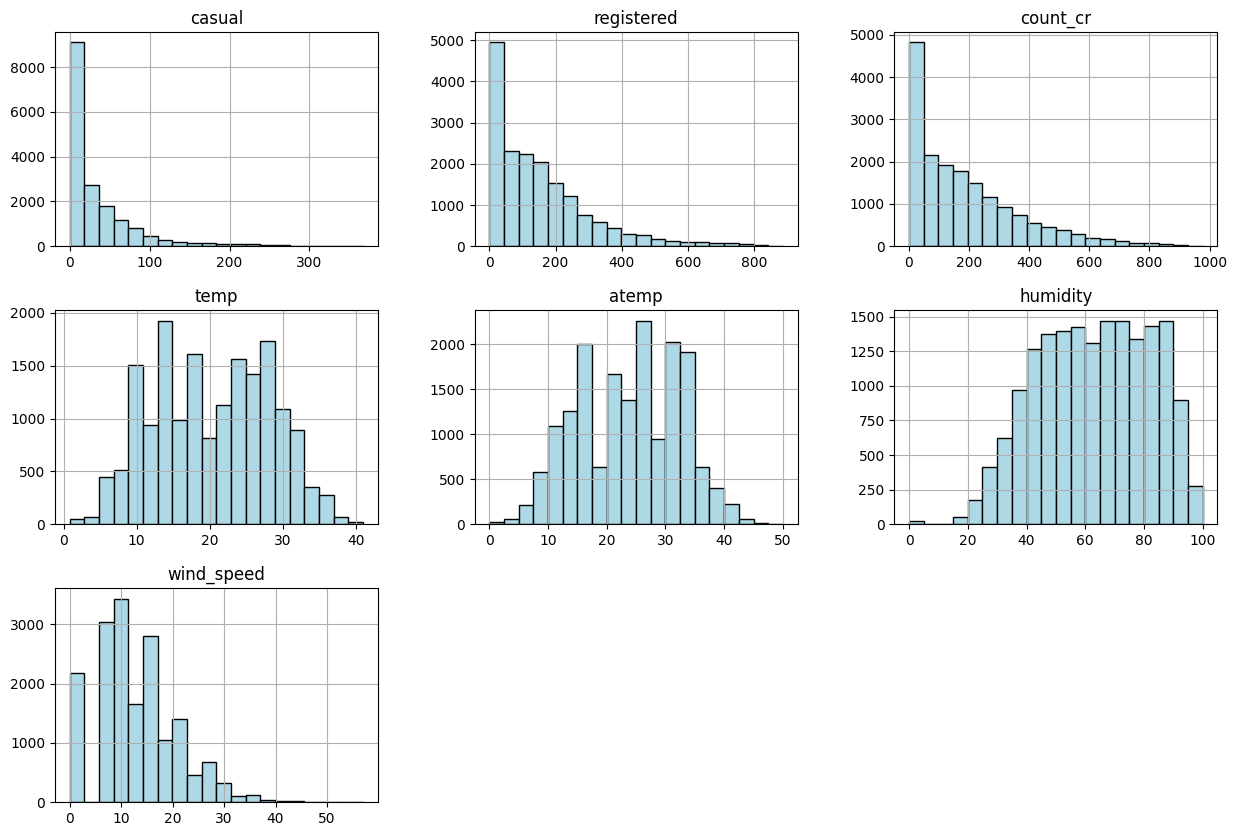

In [87]:
#Membuat histogram pada hour_df
selected_columns = ['casual', 'registered', 'count_cr', 'temp', 'atemp', 'humidity', 'wind_speed']
hour_df[selected_columns].hist(figsize=(15, 10), bins=20, edgecolor="black", color="lightblue")
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()

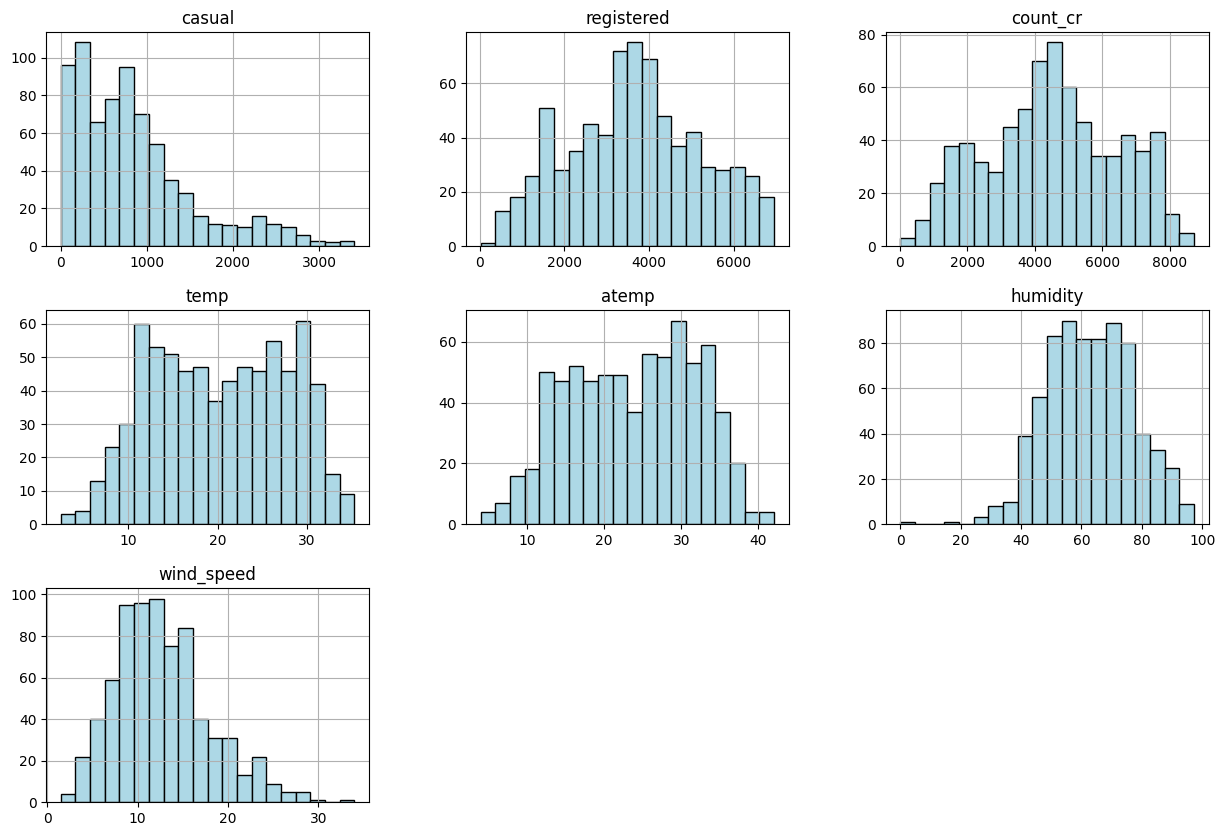

In [88]:
#Membuat histogram pada day_df
selected_columns = ['casual', 'registered', 'count_cr', 'temp', 'atemp', 'humidity', 'wind_speed']
day_df[selected_columns].hist(figsize=(15, 10), bins=20, edgecolor="black", color="lightblue")
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()


###Membuat Boxplot

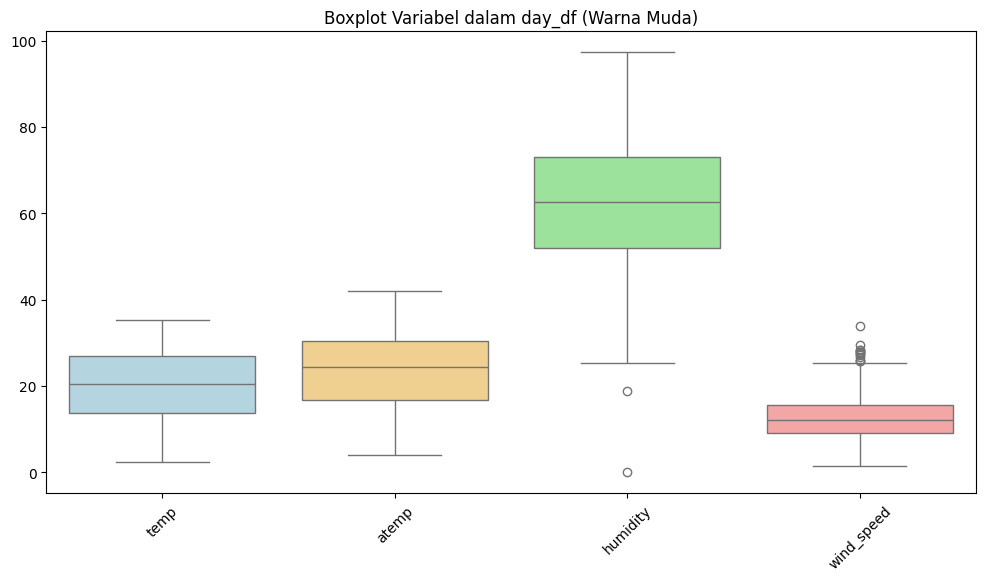

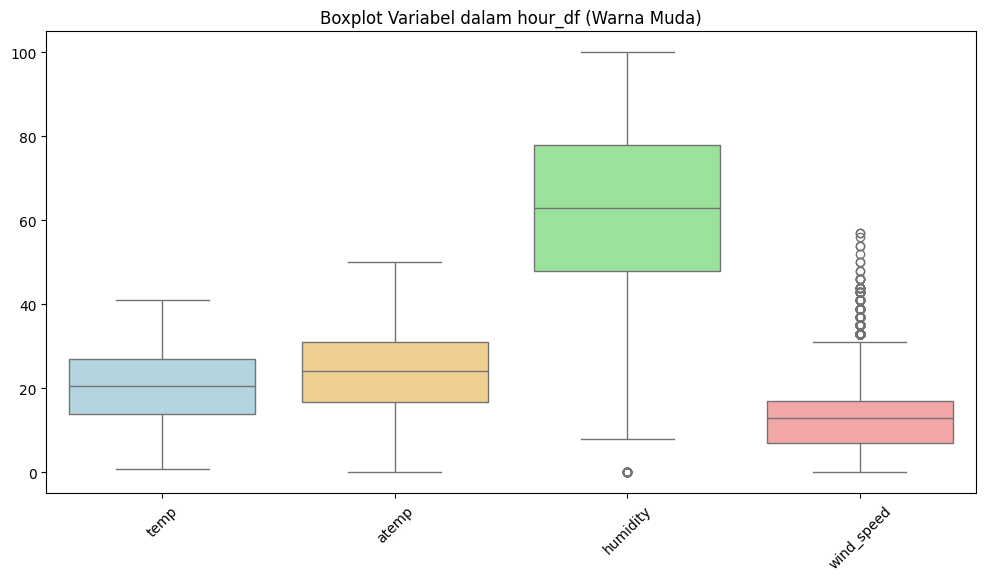

In [89]:
#Membuat boxplot untuk day_df
columns_day = ['temp', 'atemp', 'humidity', 'wind_speed']
columns_hour = ['temp', 'atemp', 'humidity', 'wind_speed']

light_palette = ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df[columns_day], palette=light_palette)
plt.xticks(rotation=45)
plt.title("Boxplot Variabel dalam day_df (Warna Muda)")

plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.show()

#Membuat boxplot untuk hour_df
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_df[columns_hour], palette=light_palette)
plt.xticks(rotation=45)
plt.title("Boxplot Variabel dalam hour_df (Warna Muda)")

plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()


### Pertanyaan 1:

Bagaimana tren penyewaan sepeda pada 2 tahun terakhir?

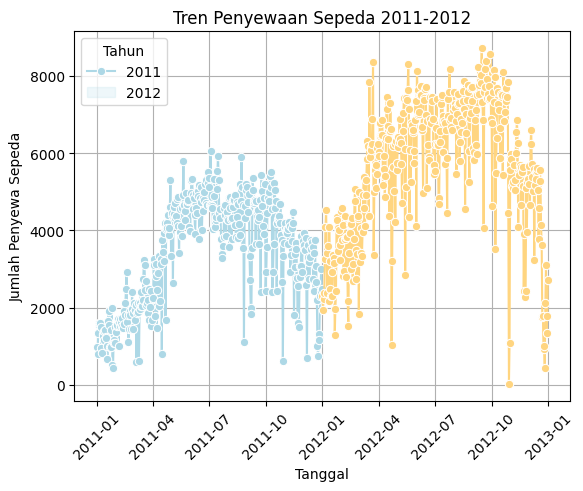

In [90]:
#Visualisasi tren penyewaan sepeda 2 tahun terakhir
sns.lineplot(
    data=day_df,
    x="dteday",
    y="count_cr",
    hue="year",
    marker="o",
    palette=["#ADD8E6", "#FFD580"]
)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.title("Tren Penyewaan Sepeda 2011-2012")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Pertanyaan 2:

Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-91-912db27ea9fd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = day_df.groupby("season")["count_cr"].sum().reset_index()
<ipython-input-91-912db27ea9fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_rentals, x="season", y="count_cr", palette= ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999", "#D8BFD8"])
<ipython-input-91-912db27ea9fd>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=season_rentals, x="season", y="count_cr", palette= ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999", "#D8BFD8"])


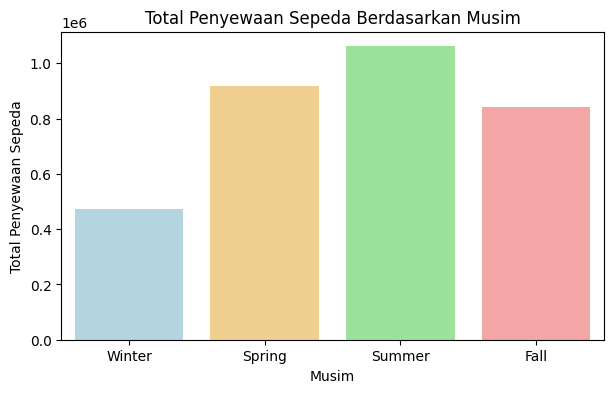

In [91]:
#Menghitung total penyewaan sepeda berdasarkan musim
season_rentals = day_df.groupby("season")["count_cr"].sum().reset_index()

#Visualisasi dengan bar chart
plt.figure(figsize=(7, 4))
sns.barplot(data=season_rentals, x="season", y="count_cr", palette= ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999", "#D8BFD8"])
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()



### Pertanyaan 3:

Bagaimana pola penyewaan sepeda berdasarkan kategori casual dan registered pada setiap hari dalam seminggu?




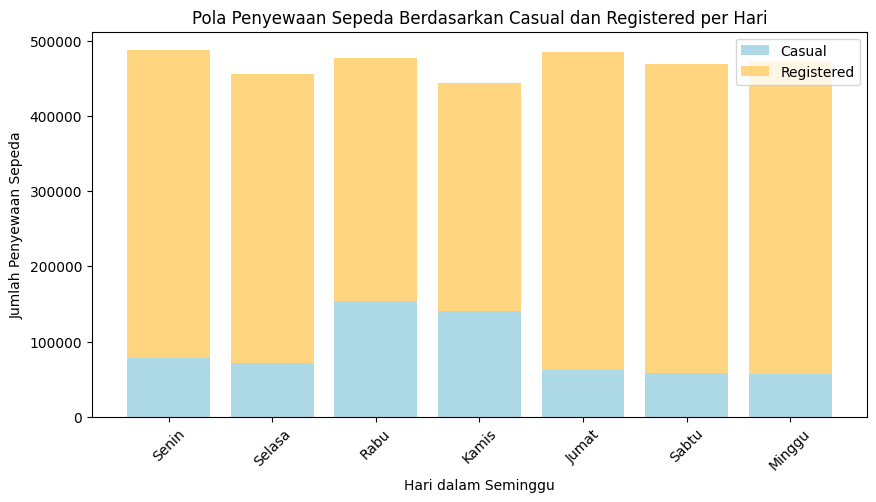

In [92]:
#Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung total penyewaan
weekly_rentals = day_df.groupby("one_of_week")[["casual", "registered"]].sum().reset_index()

#Ubah angka one_of_week menjadi nama hari (jika masih berupa angka 0-6)
days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
weekly_rentals["one_of_week"] = days

#Membuat stacked bar plot
plt.figure(figsize=(10, 5))

#Plot casual di bawah
plt.bar(weekly_rentals["one_of_week"], weekly_rentals["casual"], color="#ADD8E6", label="Casual")

#Plot registered di atas casual
plt.bar(weekly_rentals["one_of_week"], weekly_rentals["registered"],
        bottom=weekly_rentals["casual"], color="#FFD580", label="Registered")

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Casual dan Registered per Hari")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()


### Pertanyaan 4:

Bagaimana perbandingan penyewaan sepeda berdasarkan casual dan registered?

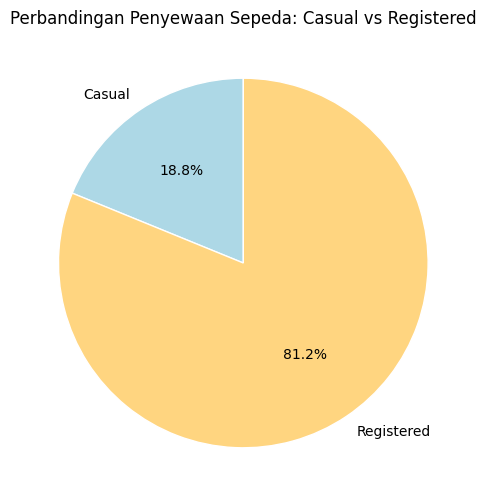

In [93]:
#Menghitung total penyewaan untuk casual dan registered
rental_counts = day_df[["casual", "registered"]].sum()

#Membuat pie chart
plt.figure(figsize=(6,6))
plt.pie(rental_counts, labels=["Casual", "Registered"], autopct="%1.1f%%",
        colors=["#ADD8E6", "#FFD580"], startangle=90, wedgeprops={"edgecolor": "white"})

plt.title("Perbandingan Penyewaan Sepeda: Casual vs Registered")
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()


### Pertanyaan 5

Bagaiamana hubungan suhu dengan jumlah penyewaan sepeda?

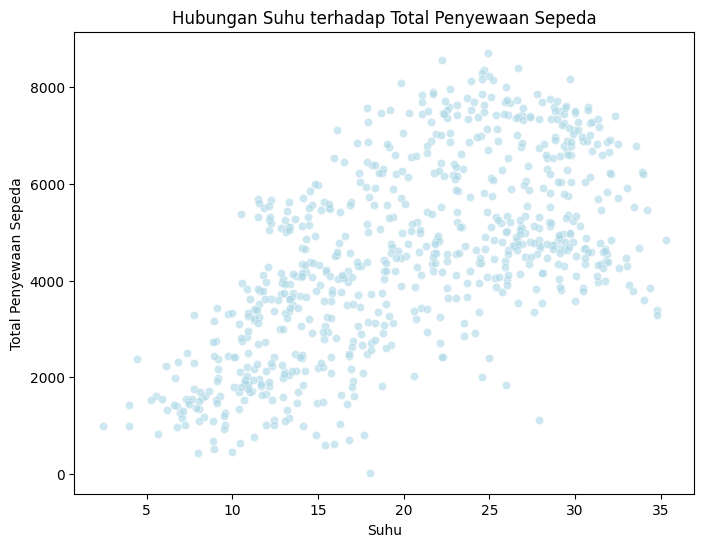

In [94]:
#Plot hubungan suhu dengan total penyewaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(data=day_df, x="temp", y="count_cr", alpha=0.6, color="lightblue")

plt.xlabel("Suhu")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Hubungan Suhu terhadap Total Penyewaan Sepeda")
plt.grid(True, linestyle="", alpha=0.5)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()

###Pertanyaan 6:

Bagaimana kecepatan angin mempengaruhi jumlah penyewaan sepeda?

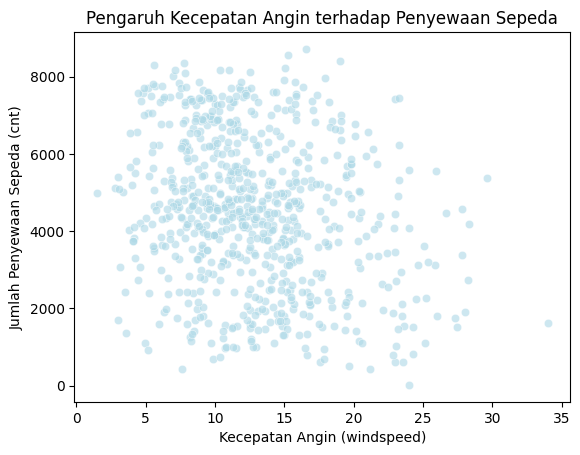

In [95]:
#Membuat scatter plot dengan Seaborn
sns.scatterplot(data=day_df, x="wind_speed", y="count_cr", alpha=0.6, color="#ADD8E6")

plt.xlabel("Kecepatan Angin (windspeed)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda")

plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()

## Analisis Lanjutan (Opsional)

### Analisis RFM

Analisis RFM (Recency, Frequency, Monetary) adalah metode segmentasi pelanggan berdasarkan:

Recency (R): Seberapa baru pelanggan terakhir kali melakukan transaksi.

Frequency (F): Seberapa sering pelanggan melakukan transaksi dalam periode tertentu.

Monetary (M): Total nilai uang yang dihabiskan oleh pelanggan.


In [96]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### Analisis kluster jumlah penyewaan sepeda

Mengelompokkan jumlah penyewaan sepeda menjadi 5 kelompok yaitu  sangat rendah, rendah, sedang, inggi, sangat tinggi.

<ipython-input-97-e442df442a6c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='rental_category', palette=light_palette)


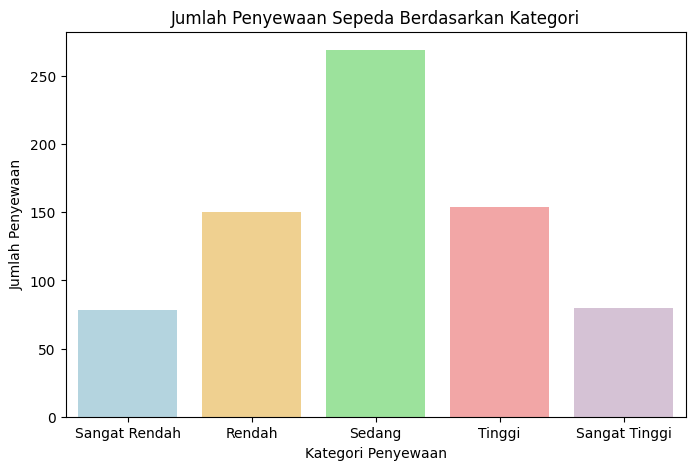

In [97]:
if 'count_cr' in day_df.columns:
    bins = [0, 1800, 3600, 5400, 7200, 9000]
    labels = ["Sangat Rendah", "Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

    day_df['rental_category'] = pd.cut(day_df['count_cr'], bins=bins, labels=labels, right=True)

    light_palette = ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999", "#D8BFD8"]

    plt.figure(figsize=(8, 5))
    sns.countplot(data=day_df, x='rental_category', palette=light_palette)

    plt.xlabel("Kategori Penyewaan")
    plt.ylabel("Jumlah Penyewaan")
    plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kategori")
    plt.gca().set_facecolor("white")
    plt.gcf().set_facecolor("white")
    plt.show()


###Analisis kluster jumlah penyewaan sepeda berdasarkan kecepatan angin

Mengelompokkan jumlah penyewaan sepeda menjadi 5 kelompok yaitu  sangat rendah, rendah, sedang, inggi, sangat tinggi berdasarkan kecepatan angin.

<ipython-input-98-190c68676d53>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='wind_category', palette=light_palette)


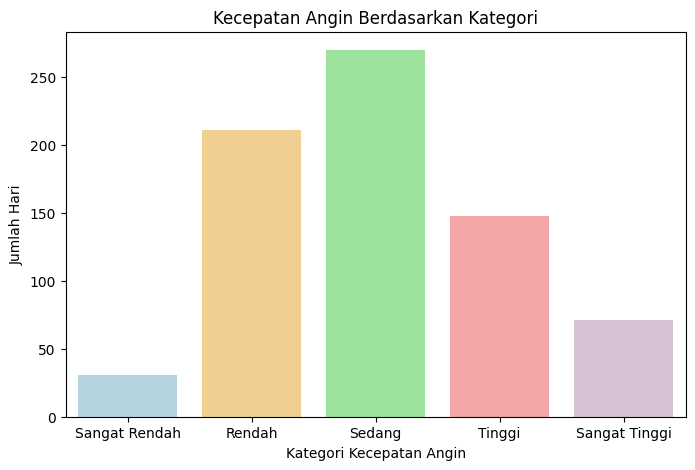

In [98]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ["Sangat Rendah", "Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]

day_df['wind_category'] = pd.cut(day_df['wind_speed'], bins=bins, labels=labels, right=True)

light_palette = ["#ADD8E6", "#FFD580", "#90EE90", "#FF9999", "#D8BFD8"]  # Light Blue, Light Orange, Light Green, Light Red, Light Purple

plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x='wind_category', palette=light_palette)

plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Jumlah Hari")
plt.title("Kecepatan Angin Berdasarkan Kategori")
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.show()

## Conclusion

- Pertanyaan 1

Pada grafik tren penyewaan sepeda dapat disimpulkan bahwa pada awal tahun 2011, jumlah penyewaan sepeda masih rendah, tetapi mengalami peningkatan secara bertahap hingga pertengahan tahun.
Tren peningkatan terlihat lebih signifikan pada awal tahun 2012 dibandingkan dengan 2011, menunjukkan pertumbuhan minat dalam penyewaan sepeda.
Setelah mencapai puncaknya sekitar pertengahan tahun 2012, jumlah penyewaan mulai menurun hingga akhir tahun.

- Pertanyaan 2

Summer memiliki jumlah penyewaan tertinggi.
Pada musim ini, cuaca cenderung lebih cerah dan hangat, yang membuat orang lebih nyaman untuk bersepeda. Faktor lain seperti liburan musim panas juga dapat meningkatkan jumlah penyewa sepeda.
Winter memiliki jumlah penyewaan terendah
Saat musim dingin, suhu yang lebih rendah dan kondisi cuaca yang lebih ekstrem (salju, hujan, atau angin kencang) mengurangi minat masyarakat untuk bersepeda.

- Pertanyaan 3

Pengguna registered lebih dominan dibandingkan pengguna casual. Pengguna casual lebih banyak di tengah minggu dibandingkan akhir pekan dan dapat dilihat bahwa tidak ada lonjakan signifikan pada akhir pekan, menunjukkan penyewaan sepeda lebih banyak digunakan untuk kegiatan rutin daripada rekreasi.

- Pertanyaan 4

Sebagian besar pengguna adalah pelanggan registered yang menunjukkan bahwa layanan ini lebih banyak digunakan untuk mobilitas sehari-hari.
Pengguna casual masih cukup rendah, sehingga ada peluang untuk meningkatkan promosi.

- Pertanyaan 5

Jumlah penyewaan sepeda cenderung meningkat seiring dengan naiknya suhu hingga sekitar 25-30 derajat (ternormalisasi). Setelah melewati titik tersebut, jumlah penyewaan mulai berfluktuasi dan tidak menunjukkan peningkatan yang konsisten. Pola ini menunjukkan bahwa suhu berpengaruh terhadap penyewaan sepeda, tetapi ada faktor lain yang mungkin memengaruhi tren setelah suhu mencapai batas tertentu.

- Pertanyaan 6

Titik-titik data tersebar tanpa pola yang jelas, menunjukkan tidak ada korelasi kuat antara kecepatan angin dan jumlah penyewaan sepeda. Kecepatan angin tidak memiliki dampak signifikan terhadap jumlah penyewaan sepeda.
